In [ ]:
from google.colab import drive
from google.colab.patches import cv2_imshow
import zipfile
import os

import torch
import torchvision
import torch.nn as nn
import pandas as pd
import seaborn as sns


import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torchvision.datasets.utils import download_url
from torch.utils.data import DataLoader, TensorDataset, random_split

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/DS/Summary of Weather.csv.zip')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
df = pd.read_csv('/tmp/Summary of Weather.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
rows = df.index
num_rows = len(rows)
print("Number of rows: ", num_rows)

columns = df.columns
num_cols = len(columns)
print("Number of columns: ", num_cols)

Number of rows:  119040
Number of columns:  31


In [ ]:
new_features = ['Precip',	'MaxTemp',	'MinTemp',	'MeanTemp',	'Snowfall',	'PoorWeather']

In [ ]:
df = df[new_features]

In [ ]:
for col in df.columns:
    if (df[col].dtype == object):
        df[col] = df[col].replace(['T','#VALUE!'],0)
        df[col] = df[col].replace(['1   1','1   1 1  1','1 0','1 0  1','1 1  1','11    1','11 1','1     0','1    1','1   1 1','1     1','1 1','1     1  1','1  1','1        1','1        1'],1)
        df[col] = df[col].fillna(0)
        df[col] = df[col].astype('float32')

df

<ipython-input-9-836dd0fd4201>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(['T','#VALUE!'],0)
<ipython-input-9-836dd0fd4201>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace(['1   1','1   1 1  1','1 0','1 0  1','1 1  1','11    1','11 1','1     0','1    1','1   1 1','1     1','1 1','1     1  1','1  1','1        1','1        1'],1)
<ipython-input-9-836dd0fd4201>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather
0,1.016,25.555556,22.222222,23.888889,0.0,0.0
1,0.000,28.888889,21.666667,25.555556,0.0,0.0
2,2.540,26.111111,22.222222,24.444444,0.0,0.0
3,2.540,26.666667,22.222222,24.444444,0.0,0.0
4,0.000,26.666667,21.666667,24.444444,0.0,0.0
...,...,...,...,...,...,...
119035,0.000,28.333333,18.333333,23.333333,0.0,0.0
119036,9.906,29.444444,18.333333,23.888889,0.0,1.0
119037,0.000,28.333333,18.333333,23.333333,0.0,1.0
119038,0.000,28.333333,18.333333,23.333333,0.0,0.0


In [ ]:
df.mean()

Precip         3.225612e+00
MaxTemp        2.704511e+01
MinTemp        1.778951e+01
MeanTemp       2.241163e+01
Snowfall       2.430539e-01
PoorWeather    1.135334e+06
dtype: float64

In [ ]:
df.min()

Precip          0.000000
MaxTemp       -33.333333
MinTemp       -38.333333
MeanTemp      -35.555556
Snowfall        0.000000
PoorWeather     0.000000
dtype: float64

In [ ]:
df.max()

Precip         3.073400e+02
MaxTemp        5.000000e+01
MinTemp        3.444444e+01
MeanTemp       4.000000e+01
Snowfall       8.636000e+01
PoorWeather    1.010001e+09
dtype: float64

In [ ]:
df.std()

Precip         1.080104e+01
MaxTemp        8.717817e+00
MinTemp        8.334572e+00
MeanTemp       8.297982e+00
Snowfall       2.613366e+00
PoorWeather    3.367522e+07
dtype: float64

In [ ]:
print("Max value for MaxTemp: ", df['MaxTemp'].max())
print("Min value for MaxTemp: ", df['MaxTemp'].min())
print("Max value for MinTemp: ", df['MinTemp'].max())
print("Min value for MinTemp: ", df['MinTemp'].min())

Max value for MaxTemp:  50.0
Min value for MaxTemp:  -33.33333333
Max value for MinTemp:  34.44444444
Min value for MinTemp:  -38.33333333


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'PoorWeather range')]

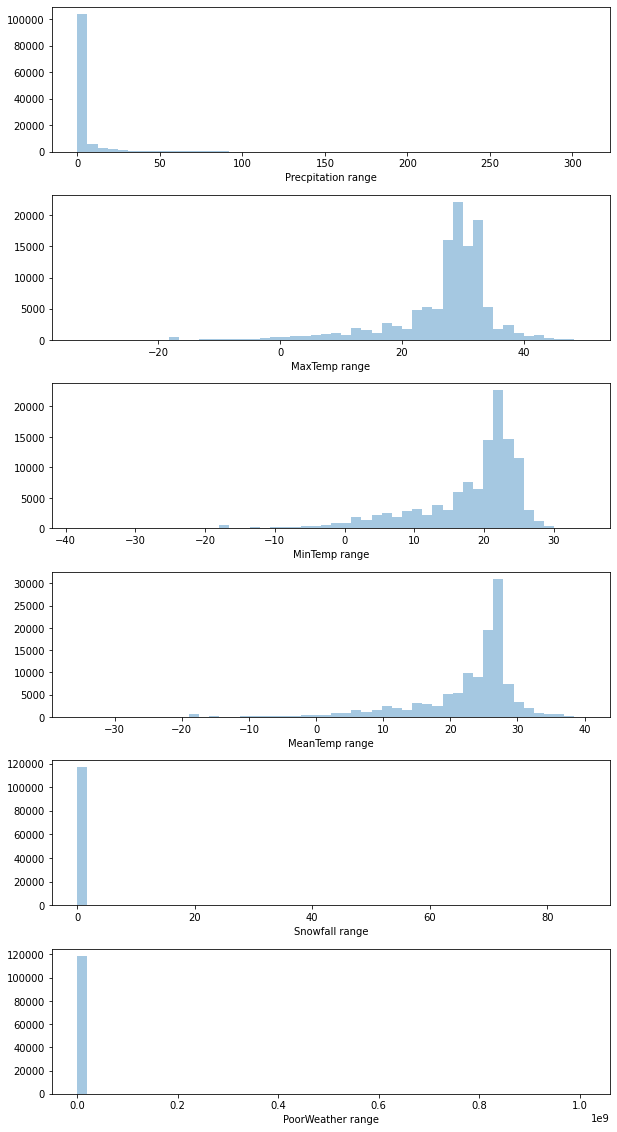

In [ ]:
fig_dims = (10, 20)
fig, axs = plt.subplots(nrows=6,figsize=fig_dims)

plt.subplots_adjust(hspace = 0.3)


pl1 = sns.distplot(df.Precip,ax=axs[0],kde=False);
pl1.set(xlabel = "Precpitation range")

pl2 = sns.distplot(df.MaxTemp,ax=axs[1],kde=False);
pl2.set(xlabel = "MaxTemp range")

pl3 = sns.distplot(df.MinTemp,ax=axs[2],kde=False);
pl3.set(xlabel = "MinTemp range")

pl4 = sns.distplot(df.MeanTemp,ax=axs[3],kde=False);
pl4.set(xlabel = "MeanTemp range")

pl5 = sns.distplot(df.Snowfall,ax=axs[4],kde=False);
pl5.set(xlabel = "Snowfall range")

pl6 = sns.distplot(df.PoorWeather,ax=axs[5],kde=False);
pl6.set(xlabel = "PoorWeather range")


In [ ]:
target = 'MaxTemp'
X = df.drop(target, axis=1)
x = X.values
# Precipitation range | MinTemp range | MeanTemp range | Snowfall range | PoorWeather range
print(x)
print("Shape of x: ", x.shape)

[[ 1.01600003 22.22222222 23.88888889  0.          0.        ]
 [ 0.         21.66666667 25.55555556  0.          0.        ]
 [ 2.53999996 22.22222222 24.44444444  0.          0.        ]
 ...
 [ 0.         18.33333333 23.33333333  0.          1.        ]
 [ 0.         18.33333333 23.33333333  0.          0.        ]
 [ 0.         17.22222222 23.33333333  0.          0.        ]]
Shape of x:  (119040, 5)


In [ ]:
X.mean()

Precip         3.225612e+00
MinTemp        1.778951e+01
MeanTemp       2.241163e+01
Snowfall       2.430539e-01
PoorWeather    1.135334e+06
dtype: float64

In [ ]:
X.min()

Precip          0.000000
MinTemp       -38.333333
MeanTemp      -35.555556
Snowfall        0.000000
PoorWeather     0.000000
dtype: float64

In [ ]:
X.max()

Precip         3.073400e+02
MinTemp        3.444444e+01
MeanTemp       4.000000e+01
Snowfall       8.636000e+01
PoorWeather    1.010001e+09
dtype: float64

In [ ]:
X.std()

Precip         1.080104e+01
MinTemp        8.334572e+00
MeanTemp       8.297982e+00
Snowfall       2.613366e+00
PoorWeather    3.367522e+07
dtype: float64

In [ ]:
np_X = X.values

In [ ]:
np_X[:5]

array([[ 1.01600003, 22.22222222, 23.88888889,  0.        ,  0.        ],
       [ 0.        , 21.66666667, 25.55555556,  0.        ,  0.        ],
       [ 2.53999996, 22.22222222, 24.44444444,  0.        ,  0.        ],
       [ 2.53999996, 22.22222222, 24.44444444,  0.        ,  0.        ],
       [ 0.        , 21.66666667, 24.44444444,  0.        ,  0.        ]])

In [ ]:
np_X.mean(axis=0)

array([3.22561224e+00, 1.77895105e+01, 2.24116310e+01, 2.43053930e-01,
       1.13533470e+06])

In [ ]:
np_X_n = (np_X - np_X.mean(0)) / np_X.std(0)

In [ ]:
np_X_n[:5]

array([[-0.2045748 ,  0.53184859,  0.1780269 , -0.09300457, -0.03371439],
       [-0.29864018,  0.46519155,  0.37887979, -0.09300457, -0.03371439],
       [-0.06347675,  0.53184859,  0.24497787, -0.09300457, -0.03371439],
       [-0.06347675,  0.53184859,  0.24497787, -0.09300457, -0.03371439],
       [-0.29864018,  0.46519155,  0.24497787, -0.09300457, -0.03371439]])

In [ ]:
Y = df[[target]]
y = Y.values
# MaxTemp
print(y)
print("Shape of y: ", y.shape)

[[25.55555556]
 [28.88888889]
 [26.11111111]
 ...
 [28.33333333]
 [28.33333333]
 [29.44444444]]
Shape of y:  (119040, 1)


In [ ]:
Y.mean()
Y.min()
Y.max()
np_y = Y.values

In [ ]:
np_y_n = (np_y - np_y.min()) / (np_y.max() - np_y.min())
np_y_n[:5]

array([[0.70666667],
       [0.74666667],
       [0.71333333],
       [0.72      ],
       [0.72      ]])

In [ ]:
np_y.min()

-33.33333333

In [ ]:
np_y.max()

50.0

In [ ]:
y_norm_sub = np_y.min()
y_norm_div = np_y.max() - np_y.min()
y_test = np_y_n * y_norm_div + y_norm_sub
y_test[:10]

array([[25.55555556],
       [28.88888889],
       [26.11111111],
       [26.66666667],
       [26.66666667],
       [26.66666667],
       [28.33333333],
       [26.66666667],
       [27.22222222],
       [25.55555556]])

In [ ]:
np_weights = np.linalg.pinv(np_X.T.dot(np_X)).dot(np_X.T).dot(np_y)
np_weights_n = np.linalg.pinv(np_X_n.T.dot(np_X_n)).dot(np_X_n.T).dot(np_y_n)

In [ ]:
np_weights

array([[-1.26026146e-03],
       [-9.32259763e-01],
       [ 1.94396462e+00],
       [ 1.05710475e-02],
       [-8.52267529e-11]])

In [ ]:
np_weights_n

array([[-5.32934611e-04],
       [-8.76262328e-02],
       [ 1.85826916e-01],
       [-5.22270719e-04],
       [-6.26143497e-05]])

In [ ]:
np_y_preds = np_X.dot(np_weights)

np_y_preds_n = np_X_n.dot(np_weights_n)

Text(0.5, 1.0, 'Normed data model predictions')

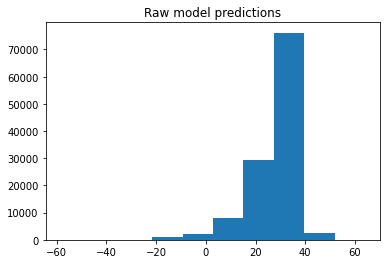

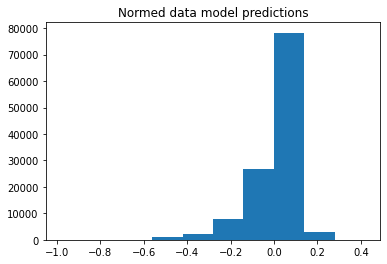

In [ ]:
plt.figure()
plt.hist(np_y_preds)
plt.title('Raw model predictions')
plt.figure()
plt.hist(np_y_preds_n)
plt.title('Normed data model predictions')

In [ ]:
batch_size=5120
target = 'MaxTemp'
x = df.drop(target, axis=1).values

dataset = TensorDataset(torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32))
print("Sample of the first registration: ", dataset[0])

num_rows = df.shape[0]

val_percent = 0.15

val_size = int(num_rows * val_percent)

train_size = num_rows - val_size

train_ds, val_ds = random_split(dataset, (train_size,val_size))

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
print(train_loader)
val_loader = DataLoader(val_ds, batch_size*2)

Sample of the first registration:  (tensor([ 1.0160, 22.2222, 23.8889,  0.0000,  0.0000]), tensor([25.5556]))


In [ ]:
x_size = x.shape[1]
y_size = y.shape[1]
x_size, y_size

(5, 1)

In [ ]:
class WW2TempPredictionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(x_size, y_size)

    def forward(self, xb):
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.l1_loss(out, targets)
        return loss

    def validation_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.l1_loss(out, targets)
        return {'val_loss': loss.detach()}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss': epoch_loss.item()}

    def epoch_end(self, epoch, result,num_epochs):
        if (epoch+1) % 10 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))



In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD, early_stopping=False, patience=5):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    best_val_loss = float('inf')
    early_stopping_counter = 0
    for epoch in range(epochs):
        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result, epochs)
        history.append(result)

        # Early Stopping Check
        if early_stopping:
            val_loss = result['val_loss']
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                early_stopping_counter = 0
            else:
                early_stopping_counter += 1
                if early_stopping_counter >= patience:
                    break

    return history


In [ ]:
list(train_loader)

[[tensor([[ 0.0000, 20.5556, 24.4444,  0.0000,  0.0000],
          [ 3.3020, 23.3333, 26.6667,  0.0000,  1.0000],
          [ 0.0000, 18.8889, 25.5556,  0.0000,  0.0000],
          ...,
          [ 0.0000, 15.0000, 21.1111,  0.0000,  0.0000],
          [ 0.0000, 23.3333, 26.6667,  0.0000,  0.0000],
          [ 0.0000,  1.1111,  5.5556,  0.0000,  0.0000]]), tensor([[28.3333],
          [30.5556],
          [32.2222],
          ...,
          [26.6667],
          [29.4444],
          [10.5556]])], [tensor([[ 0.0000, 17.7778, 23.3333,  0.0000,  0.0000],
          [ 0.0000,  5.0000, 13.3333,  0.0000,  0.0000],
          [ 0.0000, 21.6667, 26.1111,  0.0000,  0.0000],
          ...,
          [ 0.0000, 25.5556, 28.8889,  0.0000,  0.0000],
          [ 7.1120,  7.2222,  9.4444,  0.0000,  0.0000],
          [ 0.0000, 19.4444, 23.8889,  0.0000,  0.0000]]), tensor([[28.8889],
          [22.2222],
          [30.5556],
          ...,
          [31.6667],
          [11.6667],
          [28.3333]])],

In [ ]:
model = WW2TempPredictionModel()
print("Initial loss", evaluate(model, val_loader))
learning_rate=1e-10
history = fit(100 ,learning_rate, model, train_loader, val_loader, early_stopping=True, patience=5)

Initial loss {'val_loss': 350293.6875}
Epoch [9], val_loss: 326215.1875
Epoch [19], val_loss: 302181.1875
Epoch [29], val_loss: 278153.2812
Epoch [39], val_loss: 254157.3438
Epoch [49], val_loss: 230167.7344
Epoch [59], val_loss: 206133.5000
Epoch [69], val_loss: 182067.2188
Epoch [79], val_loss: 158045.8906
Epoch [89], val_loss: 134075.4219
Epoch [99], val_loss: 110022.0469


In [ ]:
# torch.save(model.state_dict(), 'model_state_dict.pt')


In [ ]:
import pickle

filename = 'ww2_temp_model.pkl'
with open(filename, 'wb') as f:
    pickle.dump(model, f)

print("Model saved to file:", filename)

Model saved to file: ww2_temp_model.pkl


In [ ]:
from google.colab import files

files.download('ww2_temp_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

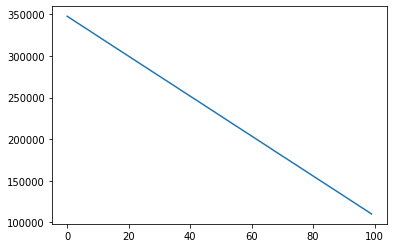

In [ ]:
plot2 = [x['val_loss'] for x in history]
plt.plot(plot2)

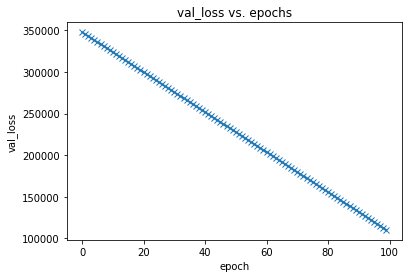

In [ ]:
losses = [r['val_loss'] for r in  history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');

In [ ]:
def predict_single(x, model):
    xb = x.unsqueeze(0)
    return model(x).item()

In [ ]:
x, target = val_ds[10]
pred = predict_single(x, model)
print("Input: ", x)
print("Target: ", target.item())
print("Prediction:", pred)

Input:  tensor([ 0.0000, 19.4444, 26.6667,  0.0000,  0.0000])
Target:  33.88888931274414
Prediction: -7.5954270362854


In [ ]:
# ['Precip',	'MinTemp',	'MeanTemp',	'Snowfall',	'PoorWeather']
VALUES = torch.tensor([0.0000, 4.9122, 6.7789, 0.0000, 1.0000])
target_pred = predict_single(VALUES, model)

print(target_pred)

-2.1830379962921143


In [ ]:
class ImprovedWW2TempPreidictionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, hidden_dim) #   self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, xb):
        out = F.relu(self.linear1(xb))
        out = self.linear2(out)
        return out

    def training_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.l1_loss(out, targets)   # mse
        return loss

    def validation_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.l1_loss(out, targets)    # mse
        return {'val_loss': loss.detach()}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss': epoch_loss.item()}

    def epoch_end(self, epoch, result,num_epochs):
        if (epoch+1) % 10 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))


In [ ]:
inputs, targets = next(iter(train_loader))
input_features = inputs.shape[1]
print(inputs)
# input_dim = 5
# hidden_dim = 32
# output_dim = 1

tensor([[ 0.0000, 15.0000, 21.1111,  0.0000,  0.0000],
        [ 0.0000, 22.7778, 26.6667,  0.0000,  0.0000],
        [ 1.0160, 22.2222, 26.6667,  0.0000,  1.0000],
        ...,
        [ 0.0000, 26.1111, 27.7778,  0.0000,  1.0000],
        [28.4480, 20.5556, 26.6667,  0.0000,  1.0000],
        [ 0.2540,  2.7778,  5.5556,  0.0000,  1.0000]])


In [ ]:
# def model_factory(layers, activation, opt_class, lr):
#     model = WW2TempPredictionModel()
#     opt = opt_class(model.parameters(), lr=lr)
#     return model, opt

In [ ]:
model = ImprovedWW2TempPreidictionModel(input_dim=5,hidden_dim=16, output_dim=1)
print("Initial loss", evaluate(model, val_loader))
learning_rate=1e-10
history = fit(100 ,learning_rate, model, train_loader, val_loader, early_stopping=True, patience=5)

Initial loss {'val_loss': 77799.5625}
Epoch [9], val_loss: 62641.9883
Epoch [19], val_loss: 47660.7695
Epoch [29], val_loss: 34075.7812
Epoch [39], val_loss: 20555.4805
Epoch [49], val_loss: 7042.9648
Epoch [59], val_loss: 110.2171
Epoch [69], val_loss: 27.9425


In [ ]:
from sklearn.preprocessing import StandardScaler

class BetterWW2TempPredictionModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.scaler = StandardScaler()
        self.linear1 = nn.Linear(input_dim, hidden_dim)
        self.linear2 = nn.Linear(hidden_dim, hidden_dim)
        self.linear3 = nn.Linear(hidden_dim, output_dim)

    def forward(self, xb):
        xb = self.scaler.transform(xb)
        out = F.relu(self.linear1(xb))
        out = F.relu(self.linear2(out))
        out = self.linear3(out)
        return out

    def training_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.mse_loss(out, targets)
        return loss

    def validation_step(self, batch):
        inputs, targets = batch
        out = self(inputs)
        loss = F.mse_loss(out, targets)
        return {'val_loss': loss.detach()}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        return {'val_loss': epoch_loss.item()}

    def epoch_end(self, epoch, result, num_epochs):
        if (epoch+1) % 10 == 0 or epoch == num_epochs-1:
            print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))


In [ ]:
import os
cwd = os.getcwd()
print(cwd)

/content


In [ ]:
torch.save(model.state_dict(), 'improved_model.pth')

In [ ]:
import joblib
joblib.dump(model, 'ww2_improved_model.joblib')

['ww2_improved_model.joblib']

In [ ]:

files.download('ww2_improved_model.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
def grid_search(model, train_loader, val_loader, optimizer_list, lr_list, num_epochs_list):
    best_model = None
    best_val_loss = float("inf")

    for optimizer in optimizer_list:
        for lr in lr_list:
            for num_epochs in num_epochs_list:
                model.optimizer = optimizer(model.parameters(), lr=lr)

                for epoch in range(num_epochs):
                    print(f"\nStarting epoch {epoch+1}/{num_epochs} with optimizer {optimizer} and learning rate {lr}")
                    for inputs, targets in train_loader:
                        loss = model.training_step((inputs, targets))
                        loss.backward()
                        model.optimizer.step()
                        model.optimizer.zero_grad()

                    result = {'val_loss': []}
                    for inputs, targets in val_loader:
                        res = model.validation_step((inputs, targets))
                        result['val_loss'].append(res['val_loss'])

                    epoch_loss = torch.stack(result['val_loss']).mean().item()
                    if epoch_loss < best_val_loss:
                        best_val_loss = epoch_loss
                        best_model = model
                    print(f"Epoch {epoch+1}/{num_epochs} completed with validation loss {epoch_loss:.4f}")

                print(f"\nlr={lr}, num_epochs={num_epochs}, val_loss={best_val_loss:.4f}")
    return {'optimizer': optimizer, 'lr': lr, 'num_epochs': num_epochs, 'model': best_model}



In [ ]:

optimizers = [torch.optim.Adam, torch.optim.SGD]


lr = [0.01, 0.001, 0.0001]


epochs = [10, 20, 30]


grid_search(ImprovedWW2TempPreidictionModel(5,16,1), train_loader, val_loader, optimizers, lr, epochs)



Starting epoch 1/10 with optimizer <class 'torch.optim.adam.Adam'> and learning rate 0.01
Epoch 1/10 completed with validation loss 2218.9507

Starting epoch 2/10 with optimizer <class 'torch.optim.adam.Adam'> and learning rate 0.01
Epoch 2/10 completed with validation loss 9439.7754

Starting epoch 3/10 with optimizer <class 'torch.optim.adam.Adam'> and learning rate 0.01
Epoch 3/10 completed with validation loss 3734.8892

Starting epoch 4/10 with optimizer <class 'torch.optim.adam.Adam'> and learning rate 0.01
Epoch 4/10 completed with validation loss 3275.8740

Starting epoch 5/10 with optimizer <class 'torch.optim.adam.Adam'> and learning rate 0.01
Epoch 5/10 completed with validation loss 31.0858

Starting epoch 6/10 with optimizer <class 'torch.optim.adam.Adam'> and learning rate 0.01
Epoch 6/10 completed with validation loss 1498.0786

Starting epoch 7/10 with optimizer <class 'torch.optim.adam.Adam'> and learning rate 0.01
Epoch 7/10 completed with validation loss 4955.6914



{'optimizer': torch.optim.sgd.SGD,
 'lr': 0.0001,
 'num_epochs': 30,
 'model': ImprovedWW2TempPreidictionModel(
   (linear1): Linear(in_features=5, out_features=16, bias=True)
   (linear2): Linear(in_features=16, out_features=1, bias=True)
 )}

In [ ]:
from re import finditer

import ast

optimizers = [torch.optim.Adam, torch.optim.SGD]


#lr = [0.01, 0.001, 0.0001]
lr = [0.01, 0.001]
epochs = [10, 20]

#epochs = [10, 20, 30]

results = grid_search(ImprovedWW2TempPreidictionModel(5,16,1), train_loader, val_loader, optimizers, lr, epochs)
#results = sorted(results, key=lambda x: x.get('val_loss'))
#best_result = results[0]

best_optimizer = results['optimizer']
best_lr = results['lr']
best_epochs = results['num_epochs']

model = ImprovedWW2TempPreidictionModel(5, 16, 1)

optimizer = best_optimizer(model.parameters(), lr=best_lr)
fit(model, train_loader, val_loader, optimizer, best_epochs)

# results = grid_search(ImprovedWW2TempPreidictionModel(5,16,1), train_loader, val_loader, optimizers, lr, epochs)
# results = [ast.literal_eval(result) for result in results]
# print(results)
# results = sorted(results, key=lambda x: x.get('val_loss', float("inf")))
# best_result = results[0]


# best_optimizer = best_result['optimizer']
# best_lr = best_result['lr']
# best_epochs = best_result['num_epochs']
# best_model = best_result['model']


# model = WW2TempPredictionModel()
# optimizer = best_optimizer(model.parameters(), lr=best_lr)
# fit(model, train_loader, val_loader, optimizer, best_epochs)



Starting epoch 1/10 with optimizer <class 'torch.optim.adam.Adam'> and learning rate 0.01
Epoch 1/10 completed with validation loss 3926.9277

Starting epoch 2/10 with optimizer <class 'torch.optim.adam.Adam'> and learning rate 0.01
Epoch 2/10 completed with validation loss 6126.0034

Starting epoch 3/10 with optimizer <class 'torch.optim.adam.Adam'> and learning rate 0.01
Epoch 3/10 completed with validation loss 561.4361

Starting epoch 4/10 with optimizer <class 'torch.optim.adam.Adam'> and learning rate 0.01
Epoch 4/10 completed with validation loss 3384.0186

Starting epoch 5/10 with optimizer <class 'torch.optim.adam.Adam'> and learning rate 0.01


In [ ]:
print(results)

In [ ]:
!pip install flask-ngrok

In [ ]:
!pip install pyngrok

In [ ]:
!ngrok authtoken 2Ln8bQZ0YQsLtjTkMc6KFBHG5fT_Caqbm5GDWEe3rVRtL5Dc

In [ ]:
uploaded = files.upload()

In [ ]:

from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)

model = ImprovedWW2TempPreidictionModel(input_dim=5, hidden_dim=16, output_dim=1)
model.load_state_dict(torch.load('/content/improved_model.pth'))

@app.route("/")
def home():
    return render_template('index.html')


@app.route('/predict',methods=['POST'])
def predict():
    precip = int(request.form["precip"])
    mintemp = int(request.form["mintemp"])
    meantemp = int(request.form["meantemp"])
    snowfall = int(request.form["snowfall"])
    poorweather = int(request.form["poorweather"])
    prediction = model.predict([[precip, mintemp, meantemp, snowfall, poorweather]])
    output = round(prediction[0], 2)

    return render_template('/content/index.html', prediction_text=f'The maximum temperature with the given input variables can be ${output}')




app.run()